# Interfacing R with Python
(Víctor Sojo | vsojo@amnh.org)

In this notebook we will:
+ Run both Python and R code inside the same Jupyter Notebook.
+ Share data between R and Python.
+ Plug Pandas to R, and vice versa.

**References:**
+ The [`r2py` tutorial](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html).
+ Tiago Antao's book [_Bioinformatics with Python Cookbook_](https://www.packtpub.com/product/bioinformatics-with-python-cookbook-second-edition/9781789344691), which I highly recommend. You may be able to access it for free from your library (e.g., Columbia University has it in digital for free).

## Contents
&emsp;[Foreword - Should I use R or Python? ... Yes ☺️](#Foreword---Should-I-use-R-or-Python?-...-Yes-☺️)<br/>
&emsp;[Getting started](#Getting-started)<br/>
&emsp;&emsp;[Installing rpy2  \(the interfacer between R and Python\) and r-essentials](#Installing-rpy2--\(the-interfacer-between-R-and-Python\)-and-r-essentials)<br/>
&emsp;&emsp;[Importing required libraries](#Importing-required-libraries)<br/>
&emsp;[Running R code in Jupyter with the %R and %%R Jupyter magics](#Running-R-code-in-Jupyter-with-the-%R-and-%%R-Jupyter-magics)<br/>
&emsp;[Passing simple variables between Python and R with the %R Jupyter magic](#Passing-simple-variables-between-Python-and-R-with-the-%R-Jupyter-magic)<br/>
&emsp;&emsp;[From R to Python](#From-R-to-Python)<br/>
&emsp;&emsp;[From Python to R](#From-Python-to-R)<br/>
&emsp;[Running entire cells of R code with the %%R magic](#Running-entire-cells-of-R-code-with-the-%%R-magic)<br/>
&emsp;[Passing dataframes between R and Python via pandas](#Passing-dataframes-between-R-and-Python-via-pandas)<br/>
&emsp;&emsp;[Passing dataframes from R to pandas](#Passing-dataframes-from-R-to-pandas)<br/>
&emsp;&emsp;[Passing dataframes from pandas to R](#Passing-dataframes-from-pandas-to-R)<br/>
&emsp;[Doing stats in R on data created in Python](#Doing-stats-in-R-on-data-created-in-Python)<br/>
&emsp;[Plotting in ggplot](#Plotting-in-ggplot)<br/>
&emsp;[In conclusion: would I recommend developing R code in Jupyter](#In-conclusion:-would-I-recommend-developing-R-code-in-Jupyter)<br/>

## _Foreword_ - Should I use R or Python? ... Yes ☺️
Seriously, Python and R are often pitted against each other in (bio)data-analysis culture wars, but this need not be: R and Python can be very good friends indeed, and here we will see how.

As time passes, I find myself using R less and less, but there's no reason you should abandon R if you feel comfortable there. Jupyter notebooks let us combine the two languages rather smoothly.

## Getting started
Let's first make sure that we're using the appropriate environment. For me that's `data`, which I created in a previous notebook by doing
```bash
conda update --all -y
conda create -n data python=3.9 jupyter pandas matplotlib plotly scikit-learn rpy2 r-essentials -y
```

In [1]:
! echo $CONDA_DEFAULT_ENV

data


I see `data` being printed out. Make sure you see whatever your desired environment is.

⚠️ If you're on Windows, you need to have an active [WSL installation](https://docs.microsoft.com/en-us/windows/wsl/install-win10)). Then, you should change every line that I start with a `!` to a `!wsl`. For example, if I do `! ls"` you should instead do `!wsl ls`.

### Installing `rpy2`  (the interfacer between R and Python) and `r-essentials`
Let's install `rpy2` (which I believe stands somewhat dyslexically for _R to Python_) and `r-essentials` (which includes a great number of R tools, some of which you may have heard about, such as `ggplot2`, `tidyverse`, `dplyr`, `randomforest` and `shiny`, plus a lot more):

In [2]:
#! conda install -y rpy2 r-essentials

I already have them both, so not a lot happens in my case. In your case, this may take a while, since `conda` needs to download a lot of other things, including R itself, tools to compile and run R code, graphics protocols so that we can plot with R, plus all the packages in `r-essentials`.

❓**Why do I need to install R if I already have it in my computer?** I'm glad you ask. This is one of the wonders of `conda` and its environments. Your R version inside the `data` environment is completely independent from whichever other version you may have running on your machine or on other environments. This may seem wasteful, but it is actually very powerful, since you can keep legacy code in one environment and latest versions in another.

### Importing required libraries
We will need:

Module        | Use
:-------------|:-----------------------------------------
**%load_ext rpy2.ipython** | Loads the Jupyter extension that lets us convert cells or bits of R code into Python using `%R` or `%%R`  "magics".
**rpy2.robjects.lib.ggplot2**   | `ggplot2` is a very popular plotting library for R. And we can use it in Jupyter!
**pandas**  | Python's dataframe tool. Great for communicating with R's dataframes.
**numpy**   | The preferred data type for communication between R and Python variables is a `numpy.array`.

In [3]:
%load_ext rpy2.ipython
from rpy2.robjects.lib import ggplot2
import pandas as pd
import numpy as np

## Running R code in Jupyter with the `%R` and `%%R` Jupyter _magics_
There are many ways of doing this, but the most elegant ones are with the `%R` and `%%R` Jupyter _magics_. The single `%R` magic lets us run R code inline, whereas the double magic `%%R` must come at the beginning of a cell and declares the entire cell as R code.

For example, using the single `%R` magic, we can run typical R code:

In [4]:
%R sqrt(9)

array([3.])

We'll look at this `array` result in detail later.

## Passing simple variables between Python and R with the `%R` _Jupyter magic_
This is surprisingly easy.

### From R to Python
The syntax for passing variables from R to Python is:
```python
my_py_var = %R my_r_var
```
For example:

In [5]:
five = %R 5
print(five)

[5.]


We can pass the results of **R** calculations to a **Python** variable too:

In [6]:
three = %R sqrt(9)
print(three)

[3.]


I'm not sure how fresh your R is, but just a reminder that every basic variable in R is considered a _vector_. To check exactly what type of variable the returned variable is in Python, we can use Python's `type()` function (always a handy one to keep in mind, along with `help()`):

In [7]:
print( type(three) )

<class 'numpy.ndarray'>


Interesting. It turns out the `%R` Jupyter magic returns a `numpy` n-dimensional array (in this case a single dimension). As discussed in the `numpy` lesson of this workshop, these arrays are the super-efficient version of a `list`. We can extract the single value by using brackets, just like we would with a `numpy.array` or a regular Python `list`:

In [8]:
print(three[0])

3.0


We can also access internal R variables, such as `pi`:

In [9]:
py_pi = %R pi
print(py_pi)

[3.14159265]


Once again, we got a `numpy` array, se we can extract the value with brackets:

In [10]:
print(py_pi[0])

3.141592653589793


Vectors can be passed the same way. You just need to assign them to a variable in Python and then they're accessible as a `numpy` array:

In [11]:
%R v <- c(1,2,3,4,5,6)
v = %R v
print(v)
print(type(v))

[1. 2. 3. 4. 5. 6.]
<class 'numpy.ndarray'>


If for whatever reason you don't want a `numpy` array, you can always turn it into a `list`:

In [12]:
v = list(v)
print(v)
print(type(v))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
<class 'list'>


### From Python to R
The syntax is for sending _simple_ Python variables into R is:
```python
%R -i my_py_var
```
(and now `my_py_var` can be used inside R)

Let's see an example:

In [13]:
my_py_var = 42
%R -i my_py_var
%R print(my_py_var)
%R print(sqrt(my_py_var))

[1] 42
[1] 6.480741


array([6.4807407])

You'll notice that whatever was calculated last gets sent as an output to Jupyter. If you want to stop that behaviour, you could add a `;` at the end of the last line.

If you're sending a list, it is best to first turn it into a `numpy.array`:

In [14]:
my_list = [1,2,3,4,5,6]
my_arr = np.array(my_list)
%R -i my_arr
%R print(my_arr);

[1] 1 2 3 4 5 6


(The `;` at the end of the last line is not necessary, but it prevents Jupyter from printing the numpy array)

## Running entire cells of R code with the `%%R` magic
The Jupyter magic `%R` lets us run R code inline. Its bigger sister, `%%R` lets us declare an entire cell as R code (just remember to put it in the very first line of the cell):

In [15]:
%%R
# Everything in this cell is R code!
v1 <- c(1,2,3,2,4,1,3,1)
v2 <- c(2,2,4,2,7,2,2,4)
myttest <- t.test(v1, v2, paired=TRUE)
print(myttest)


	Paired t-test

data:  v1 and v2
t = -2, df = 7, p-value = 0.08562
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.1823121  0.1823121
sample estimates:
mean of the differences 
                     -1 



## Passing _dataframes_ between R and Python _via_ `pandas`
Besides simple variables and vectors, you can also pass entire dataframes. Regular Python doesn't have dataframes, but that's what `pandas` is for, so the main communication between R and Python happens via `pandas`.

### Passing dataframes from R to `pandas`
Let's load the famous `iris` dataset into R:

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                
[1] 5.1 4.9 4.7 4.6 5.0 5.4


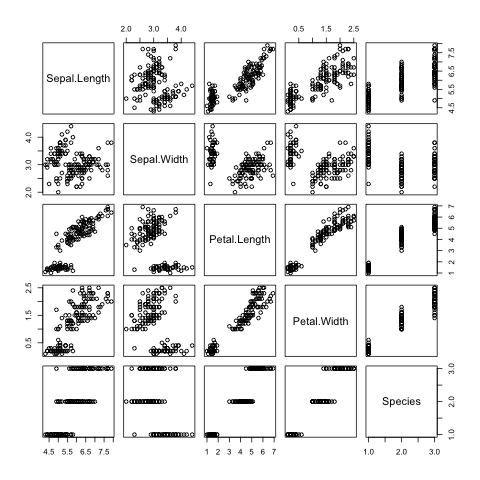

In [16]:
%%R
data(iris)
print(summary(iris))
print(head(iris$Sepal.Length))
plot(iris)

We can now pass this dataframe from R to Python just like we did with simple variables and vectors:

In [17]:
pyris = %R iris

And as we can see, the data is received by Python as a `pandas` `DataFrame`

In [18]:
print(type(pyris))

<class 'pandas.core.frame.DataFrame'>


Let's just use the nice default `pandas` formatting to explore the dataframe:

In [19]:
pyris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


We can now use this data in Python as we would any `pandas` `DataFrame`. Please check out the `pandas` lesson to learn more 🐼.

Note that here I'm just sending the dataframe directly to the Jupyter output on the last line of the cell, instead of following my typical advice of always printing with `print()`. This is because `pandas` dataframes look much nicer if you let them print themselves than if you try to print them with `print()`.

### Passing dataframes from `pandas` to R
Let's create a pandas dataframe in Python:

In [20]:
even_numbers = [0,2,4,6,8,10,12]
df = pd.DataFrame(even_numbers, columns=['evens'])
df

,evens
0,0
1,2
2,4
3,6
4,8
5,10
6,12


And let's add a few more columns:

In [21]:
df['squares'] = df.evens**2
df['cubes'] = df.evens**3
df

,evens,squares,cubes
0,0,0,0
1,2,4,8
2,4,16,64
3,6,36,216
4,8,64,512
5,10,100,1000
6,12,144,1728


We can now send this dataframe to R just like we did with simple variables using `%R -i`:

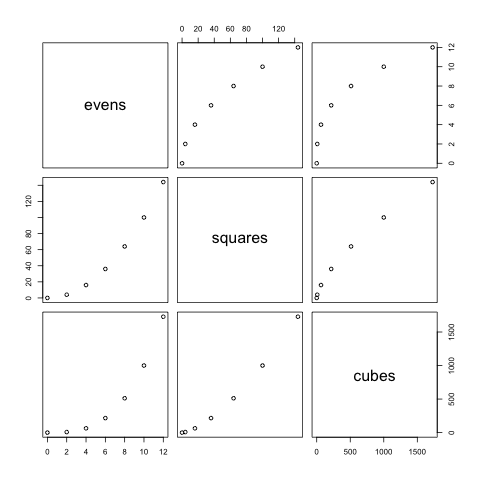

In [22]:
%R -i df
%R plot(df)

And once in there you can do all of your typical R wizardry ®️✨🧙.

## Doing stats in R on data created in Python

We can create data in Python in whichever way, and then store it as `numpy` arrays:

In [23]:
v1 = np.array([1,1,2,2,1,2,2,1])
v2 = np.array([2,2,3,2,1,1,2,2])

Then we can bring it into R at the top of a `%%R` block, separated by commas (without spaces)

In [24]:
%%R -i v1,v2
print(v1)
print(v2)
myttest <- t.test(v1, v2, paired=TRUE)
print(myttest)

[1] 1 1 2 2 1 2 2 1
[1] 2 2 3 2 1 1 2 2

	Paired t-test

data:  v1 and v2
t = -1.4256, df = 7, p-value = 0.197
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9970195  0.2470195
sample estimates:
mean of the differences 
                 -0.375 



We can now access the outcome of the R `t.test` in Python:

In [25]:
tstat = %R myttest$statistic
p_val = %R myttest$p.value
meand = %R myttest$estimate
confi = %R myttest$conf.int

print(f"The t statistic is {tstat[0]}\n" +
      f"The p-value is {p_val[0]}\n" +
      f"The mean of the differences between the two groups is {meand[0]}\n" +
      f"and the confidence interval is {confi}")

The t statistic is -1.4255728899344744
The p-value is 0.1970220721577505
The mean of the differences between the two groups is -0.375
and the confidence interval is [-0.99701947  0.24701947]


(remember that we get `numpy.ndarray`s as output, so for most of the results we extract the only result with `[0]`)

Really cool, innit?

## Plotting in `ggplot`
Let's say we have some data in Python that we want to plot, but we don't like Python's Matplotlib plots, and we also don't like R's default plotter. We want `ggplot2`. We can easily do that in Jupyter. Above we installed `ggplot2` as part of the `r-essentials` package, and we then imported it into this notebook by issuing:
```python
import rpy2.robjects.lib.ggplot2 as ggplot2
```
Here we will use `ggplot` to create an XY dispersion graph of the very famous Iris dataset:

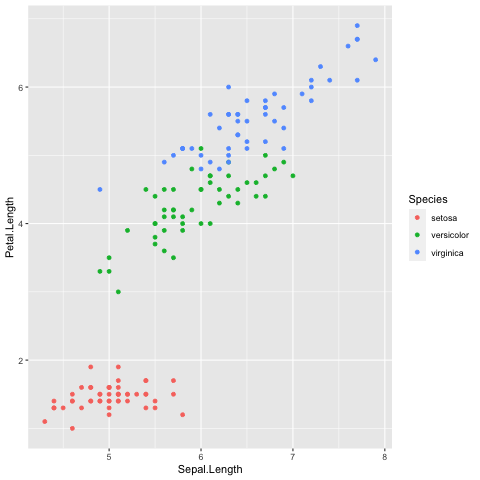

In [26]:
%%R
# Load the iris dataset
data("iris")
# Create a plot with ggplot for the petal length versus sepal length, coloured by the iris species
IrisPlot <- ggplot(iris, aes(Sepal.Length, Petal.Length, colour=Species)) + geom_point()
print(IrisPlot)

## In conclusion: would I recommend _developing_ R code in Jupyter
Perhaps not on a regular basis. I still develop my R code in RStudio like everybody else, chiefly because the R code completion works in RStudio but I haven't managed to make it work in Jupyter. So, I would keep both windows open, do my explorations and toy-data tests in RStudio, then bring the code in to Jupyter once I'm satisfied that it does what I want, and run it with my full data here. That's how I developed this Notebook anyway, but I'm happy to receive your comments if you find how to make code completion work for R inside Jupyter.

In all honesty, though, as Python gets better and better, I am finding fewer and fewer reasons to use R. In fact, other than preparing this tutorial, it's been several years since the last time I felt that I needed to use R in my research or teaching.